In [1]:
# imports
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import numpy as np

# allow plots to appear directly in the notebook
%matplotlib inline

In [2]:
# set up folder link and files
folder_link = 'C:/Users/Michael/projects/kaggle/rossman/'

train_file = folder_link + 'train.csv'
test_file = folder_link + 'test.csv'
submission_file = folder_link + 'predictions_linregstatsmodels.csv'

In [3]:
# set up dataframes
train = pd.read_csv(train_file)
test = pd.read_csv(test_file)

C:\Users\Michael\Anaconda\lib\site-packages\pandas\io\parsers.py:1170: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [4]:
# print the shape of the dataframe
train.shape

(1017209, 9)

In [5]:
# list out columns
list(train.columns)

['Store',
 'DayOfWeek',
 'Date',
 'Sales',
 'Customers',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday']

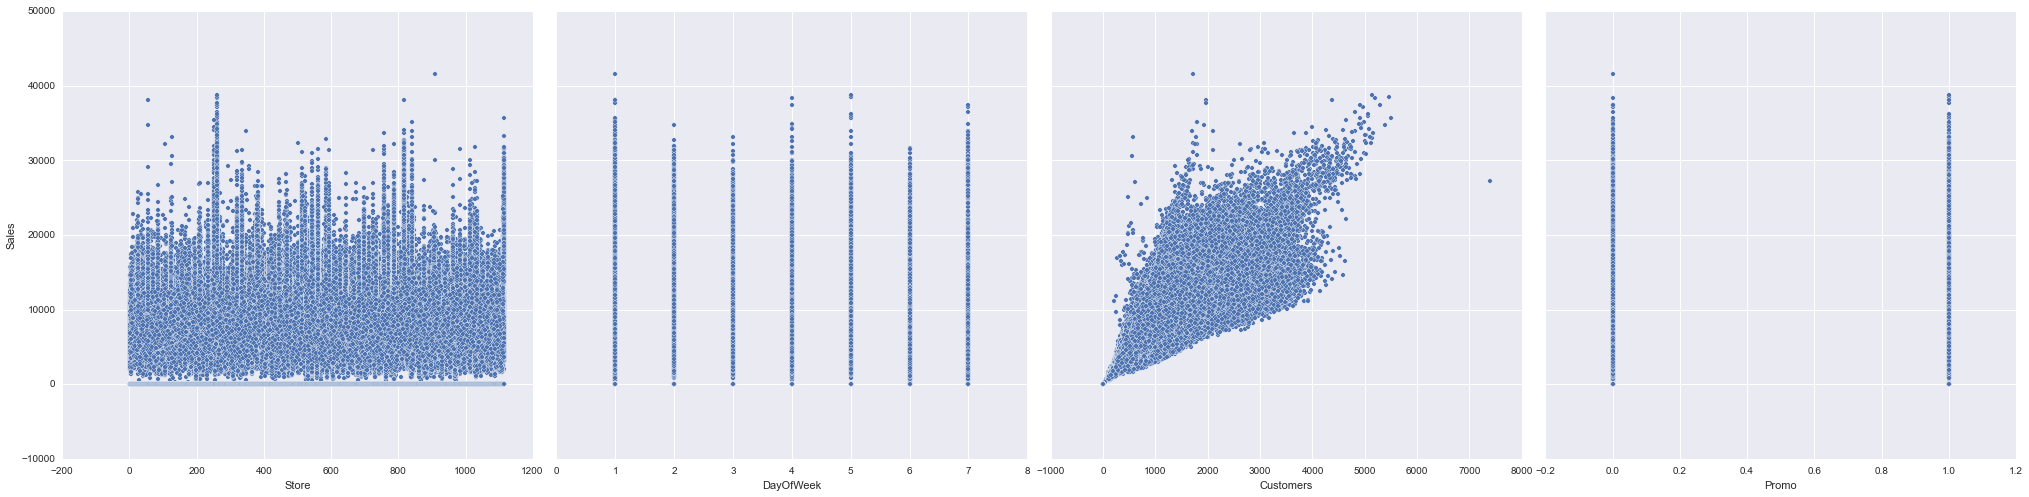

In [6]:
# visualize relationship
sns.pairplot(train,x_vars=['Store','DayOfWeek','Customers','Promo'],y_vars='Sales',size=7,aspect=1.0)

In [9]:
# create a fitted model
lm1 = smf.ols(formula='Sales ~ Store',data=train).fit()

# print the coefficients
lm1.params

Intercept    5739.582735
Store           0.061308
dtype: float64

In [10]:
# create a dataframe for inputs
X_new = pd.DataFrame({'Store':[1,2]})

# predict for new observations
lm1.predict(X_new)

array([ 5739.64404343,  5739.70535148])

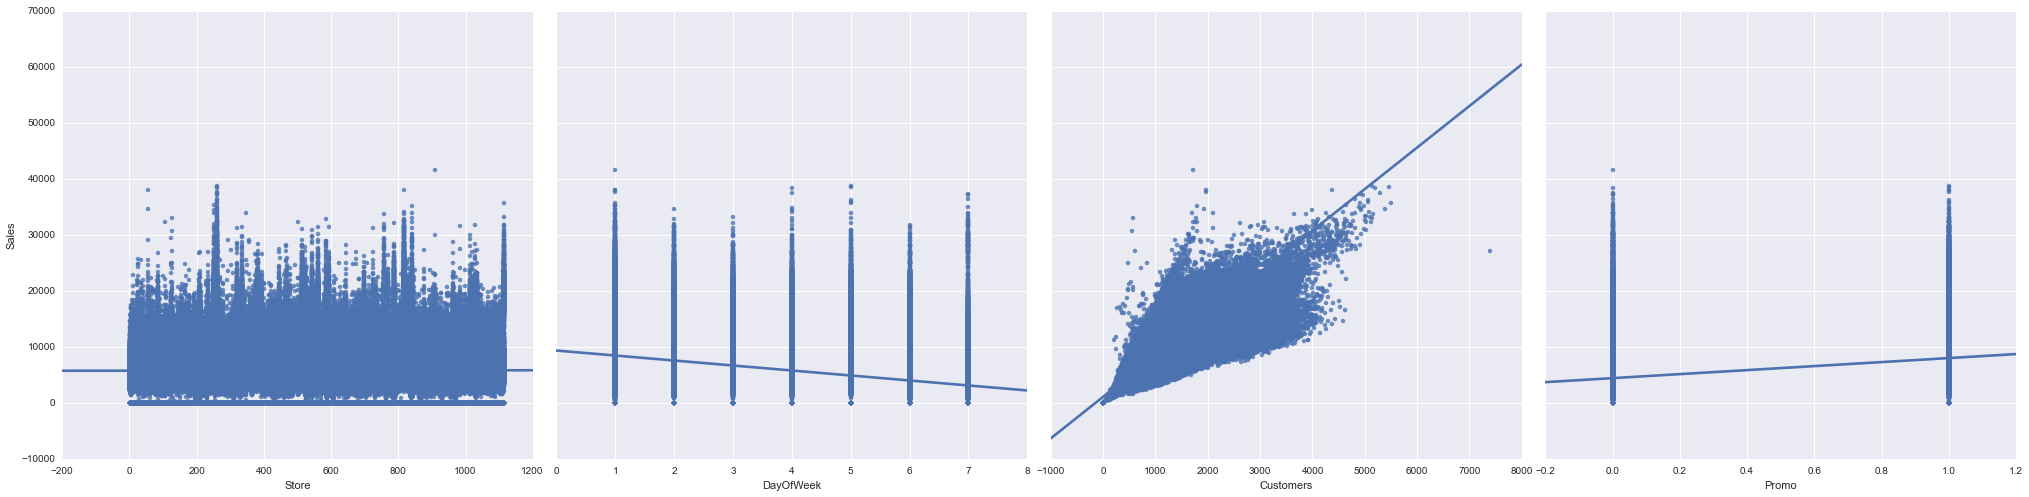

In [11]:
# plot least squares line for sales vs each of the features
sns.pairplot(train,x_vars=['Store','DayOfWeek','Customers','Promo'],y_vars='Sales',size=7,aspect=1.0,kind='reg')

In [12]:
# prin teh confidence intervals for the model coefficients
lm1.conf_int()

,0,1
Intercept,5724.602204,5754.563267
Store,0.038067,0.084549


In [13]:
# print the p-values for the model coefficients
lm1.pvalues

Intercept    0.000000e+00
Store        2.338762e-07
dtype: float64

In [14]:
# print the r-squared value for the model
lm1.rsquared

2.6278192011952584e-05

In [15]:
# create a fitted model with all four variables
lm1 = smf.ols(formula='Sales ~ Store + DayOfWeek + Customers + Promo',data=train).fit()

# print the coefficients
lm1.params

Intercept    1777.832757
Store          -0.174703
DayOfWeek    -163.596145
Customers       6.721844
Promo        1288.943504
dtype: float64

In [16]:
# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                 1.317e+06
Date:                Tue, 27 Oct 2015   Prob (F-statistic):               0.00
Time:                        19:07:21   Log-Likelihood:            -8.9149e+06
No. Observations:             1017209   AIC:                         1.783e+07
Df Residuals:                 1017204   BIC:                         1.783e+07
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept   1777.8328      5.918    300.436      0.000      1766.235  1789.431
Store         -0.1747      0.005    -36.612      0.000        -0.184    -0.165
DayOfWeek   -163.5961      0.877   -186.634      0.000      -165.314  -161.878
Customers      6.7218      0.004   1838.865      0.000         6.715     6.729
Promo       1288.9435      3.504    367.850      0.000      1282.076  1295.811
==============================================================================
Omnibus:                   175335.025   Durbin-Watson:                   1.694
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3980138.313
Skew:                          -0.111   Prob(JB):                         0.00
Kurtosis:                      12.688   Cond. No.                     3.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
# print rsquared
lm1.rsquared

0.83818738464960674

In [20]:
# test for correlation (Pearson correlation coefficient)
from scipy.stats.stats import pearsonr
print pearsonr(train['Store'],train['Customers'])
print pearsonr(train['DayOfWeek'],train['Store'])

(0.024324868982130234, 5.9712981871851536e-133)
(-8.483588082413719e-06, 0.99317317581610198)
